# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

# 0. Import the data and python libraries

In [36]:
# All required libraries are imported here for you.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")
print(crops.shape)
crops.head()

(2200, 5)


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


# 1. Explatory Data Analysis

In [4]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [5]:
#crop types
crops.crop.value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [22]:
crop_mean = crops.groupby("crop").mean()
crop_mean.head(5)

,N,P,K,ph
crop,,,,
apple,20.80,134.22,199.89,5.929663
banana,100.23,82.01,50.05,5.983893
blackgram,40.02,67.47,19.24,7.133952
chickpea,40.09,67.79,79.92,7.336957
coconut,21.98,16.93,30.59,5.976562


<Axes: ylabel='crop'>

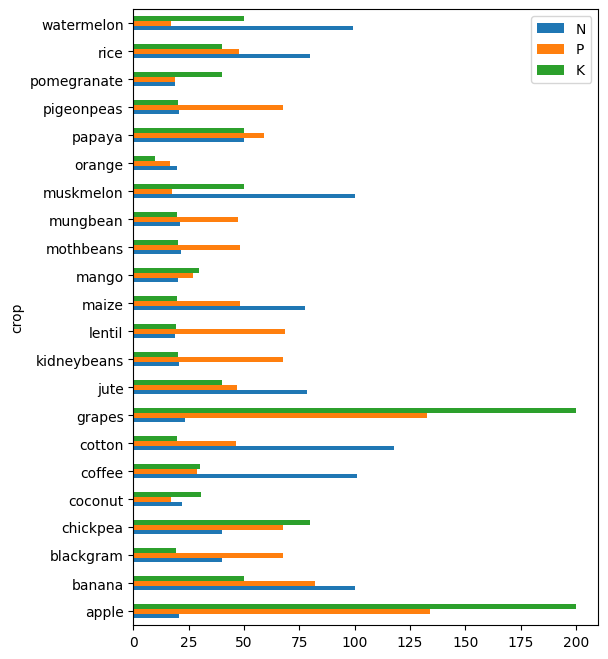

In [21]:
crop_mean.plot.barh(y=["N","P","K"], figsize=(6,8));

# 2. Split the data

In [25]:
X = crops.drop("crop", axis=1)
y = crops["crop"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
X_train.head()

,N,P,K,ph
265,29,75,75,7.064790
1883,17,29,26,6.071897
1918,123,39,24,7.453106
2062,98,43,35,7.319952
1800,18,30,29,6.420019


In [28]:
y_train.head()

265     chickpea
1883     coconut
1918      cotton
2062        jute
1800     coconut
Name: crop, dtype: object

In [30]:
features = X.columns
features

Index(['N', 'P', 'K', 'ph'], dtype='object')

# 3. Feature Performance

In [64]:
model = LogisticRegression(multi_class="multinomial", max_iter=10000)
feature_performance = {}
for feature in features:
    model.fit(X_train[feature].values.reshape(-1,1),y_train.values)
    y_pred = model.predict(X_test[feature].values.reshape(-1,1))
    feature_importance = metrics.f1_score(y_test, y_pred, average="weighted")
    feature_performance[feature] = feature_importance

0.11983282955954117
0.17278326243952985
0.24714979993316874
0.08329230687766213


In [65]:
feature_performance

{'N': 0.11983282955954117,
 'P': 0.17278326243952985,
 'K': 0.24714979993316874,
 'ph': 0.08329230687766213}

In [67]:
best_predictive_feature = {'K': 0.24714979993316874}
best_predictive_feature

{'K': 0.24714979993316874}